<a href="https://colab.research.google.com/github/fernandodevgama/farmTech_cloud_computing_fase_5/blob/main/FernandoRicardo_rm566501_pbl_fase5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Rendimento de Safra e Modelagem Preditiva

Este notebook contém a análise completa do conjunto de dados `crop_yield.csv`, com o objetivo de prever o rendimento da safra e explorar tendências de produtividade.

## Meta 1: Análise Exploratória de Dados

Nesta primeira etapa, vamos carregar o dataset e realizar uma análise exploratória para nos familiarizarmos com os dados, identificar a estrutura, verificar a presença de valores ausentes e visualizar as distribuições e correlações entre as variáveis.

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Carregar o dataset
df = pd.read_csv('/content/sample_data/crop_yield.csv')

# Exibir as primeiras linhas
print("Primeiras 5 linhas do dataset:")
print(df.head())

Primeiras 5 linhas do dataset:
           Crop  Precipitation (mm day-1)  \
0  Cocoa, beans                   2248.92   
1  Cocoa, beans                   1938.42   
2  Cocoa, beans                   2301.54   
3  Cocoa, beans                   2592.35   
4  Cocoa, beans                   2344.72   

   Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
0                                 17.72                              83.40   
1                                 17.54                              82.11   
2                                 17.81                              82.79   
3                                 17.61                              85.07   
4                                 17.61                              84.12   

   Temperature at 2 Meters (C)  Yield  
0                        26.01  11560  
1                        26.11  11253  
2                        26.24   9456  
3                        25.56   9321  
4                        25.7

In [64]:
# Informações gerais do DataFrame
print("\nInformações do DataFrame:")
df.info()

# Estatísticas descritivas
print("\nEstatísticas Descritivas:")
print(df.describe())

# Verificar valores ausentes
print("\nValores Ausentes:")
print(df.isnull().sum())


Informações do DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 6 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Crop                                  156 non-null    object 
 1   Precipitation (mm day-1)              156 non-null    float64
 2   Specific Humidity at 2 Meters (g/kg)  156 non-null    float64
 3   Relative Humidity at 2 Meters (%)     156 non-null    float64
 4   Temperature at 2 Meters (C)           156 non-null    float64
 5   Yield                                 156 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 7.4+ KB

Estatísticas Descritivas:
       Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
count                156.000000                            156.000000   
mean                2486.498974                             18.203077   
std                  289.

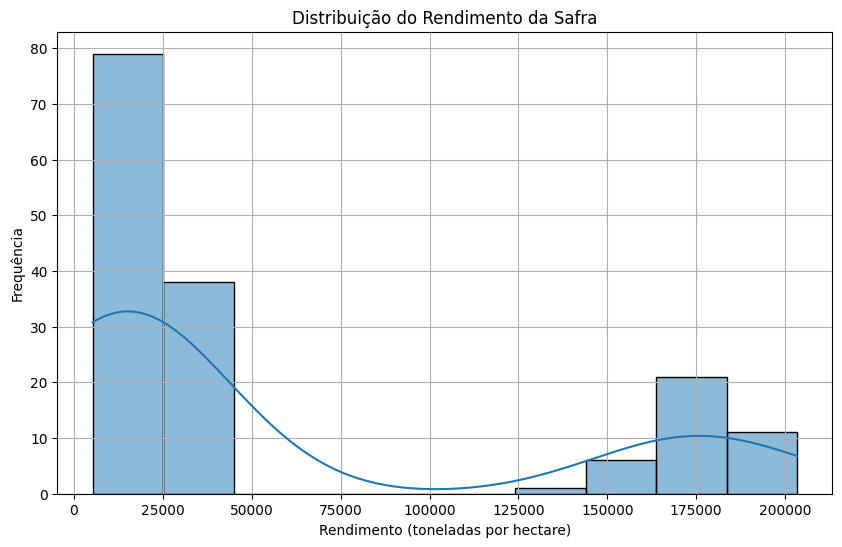

In [65]:
# Visualizar a distribuição do rendimento
plt.figure(figsize=(10, 6))
sns.histplot(df['Yield'], kde=True)
plt.title('Distribuição do Rendimento da Safra')
plt.xlabel('Rendimento (toneladas por hectare)')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()

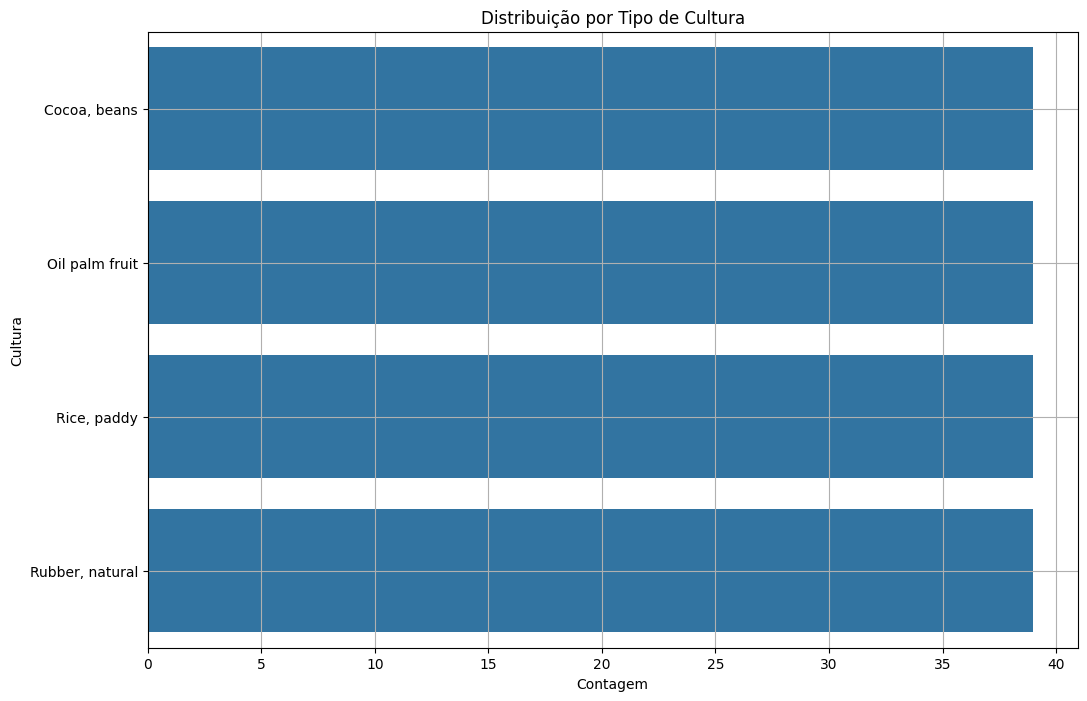

In [66]:
# Visualizar a distribuição por tipo de cultura
plt.figure(figsize=(12, 8))
sns.countplot(y='Crop', data=df, order = df['Crop'].value_counts().index)
plt.title('Distribuição por Tipo de Cultura')
plt.xlabel('Contagem')
plt.ylabel('Cultura')
plt.grid(True)
plt.show()

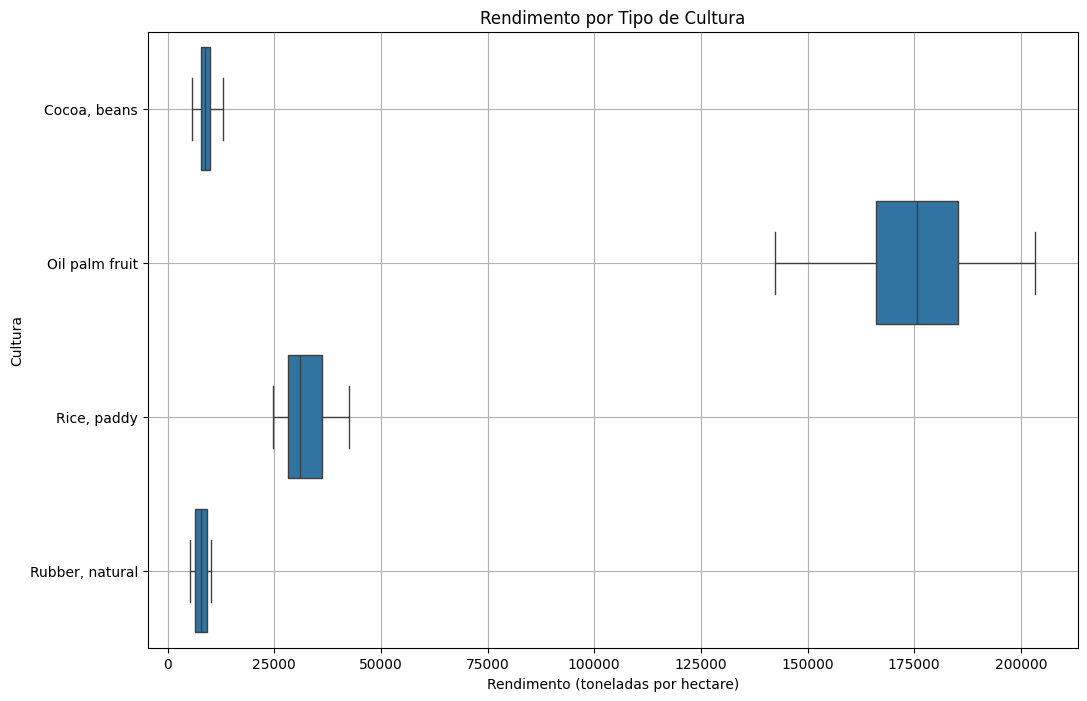

In [67]:
# Relação entre Cultura e Rendimento
plt.figure(figsize=(12, 8))
sns.boxplot(y='Crop', x='Yield', data=df)
plt.title('Rendimento por Tipo de Cultura')
plt.xlabel('Rendimento (toneladas por hectare)')
plt.ylabel('Cultura')
plt.grid(True)
plt.show()

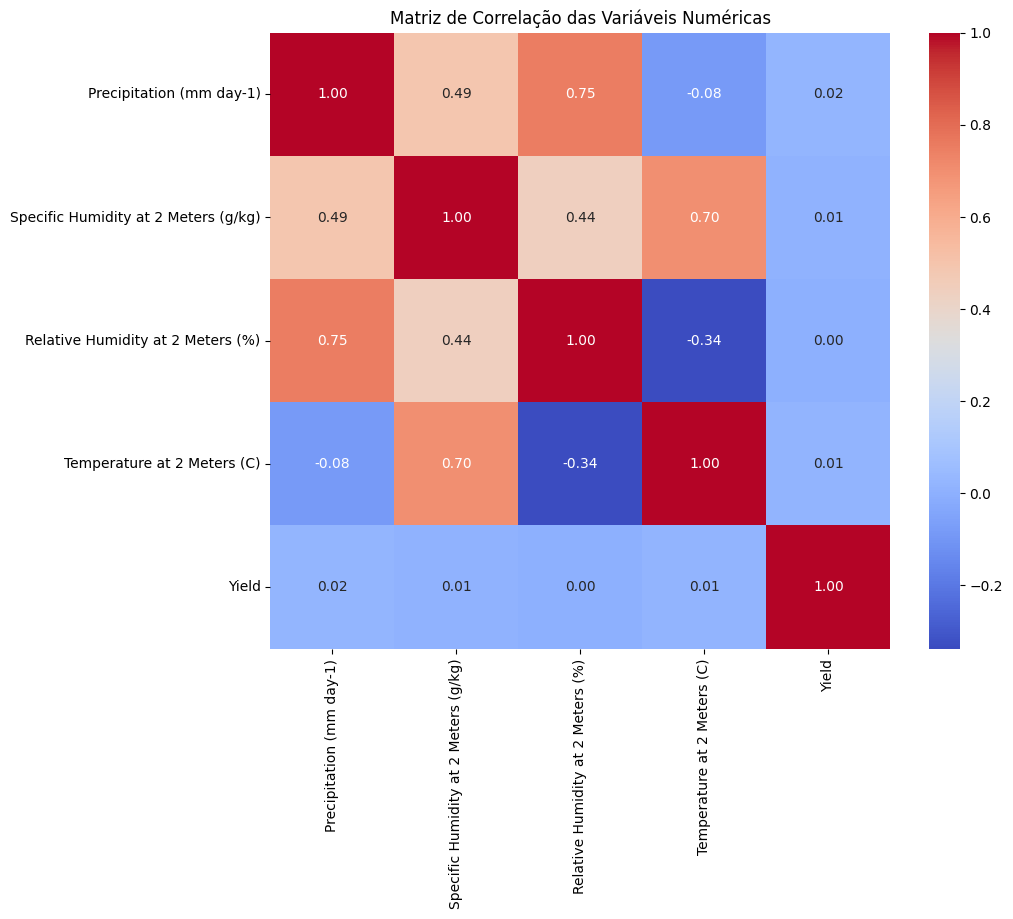

In [68]:
# Matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação das Variáveis Numéricas')
plt.show()

## Meta 2: Tendências de Rendimento e Detecção de Outliers

Nesta seção, utilizamos a clusterização com o algoritmo K-Means para identificar tendências nos rendimentos das plantações e detectar cenários discrepantes (outliers).

In [69]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Preparar os dados para clusterização
features_for_clustering = ['Precipitation (mm day-1)', 'Specific Humidity at 2 Meters (g/kg)', 'Relative Humidity at 2 Meters (%)', 'Temperature at 2 Meters (C)', 'Yield']
X_clustering = df[features_for_clustering]

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

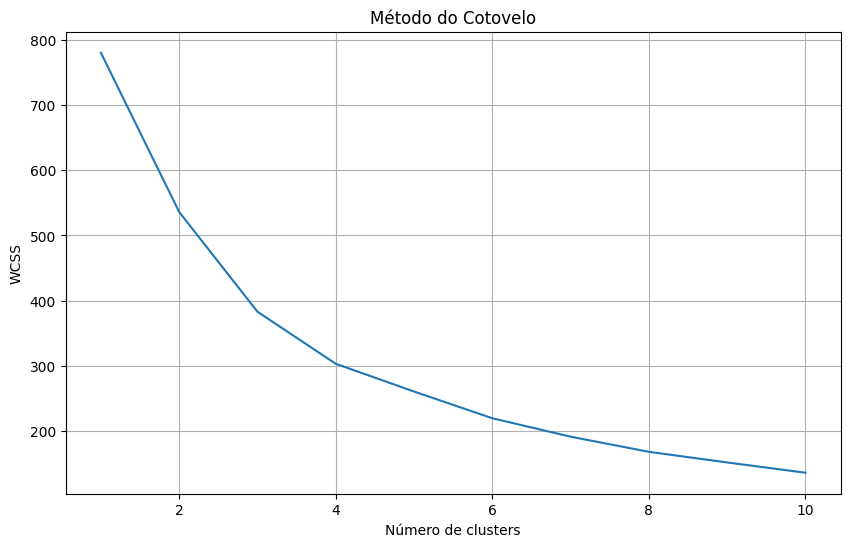

In [70]:
# Método do Cotovelo (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [71]:
# Coeficiente de Silhueta
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

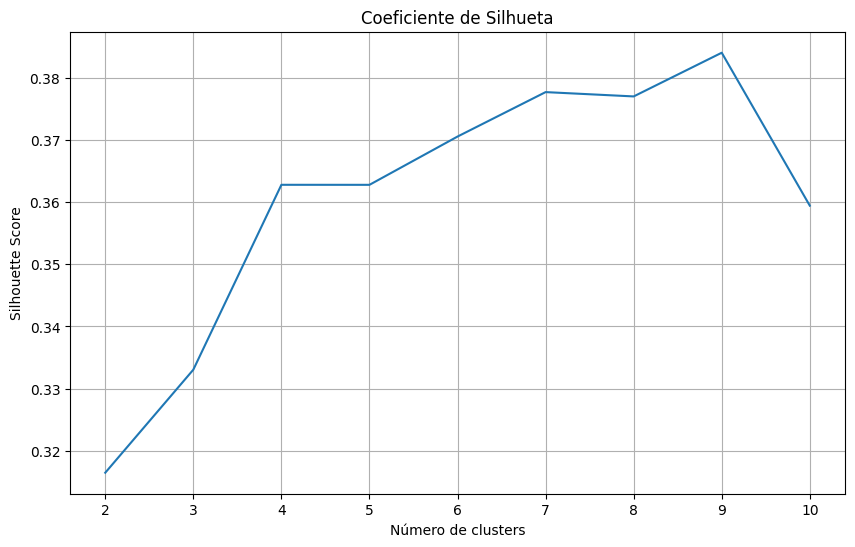

In [72]:
# Coeficiente de Silhueta
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores)
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [73]:
# Aplicar o K-Means com 3 clusters
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)

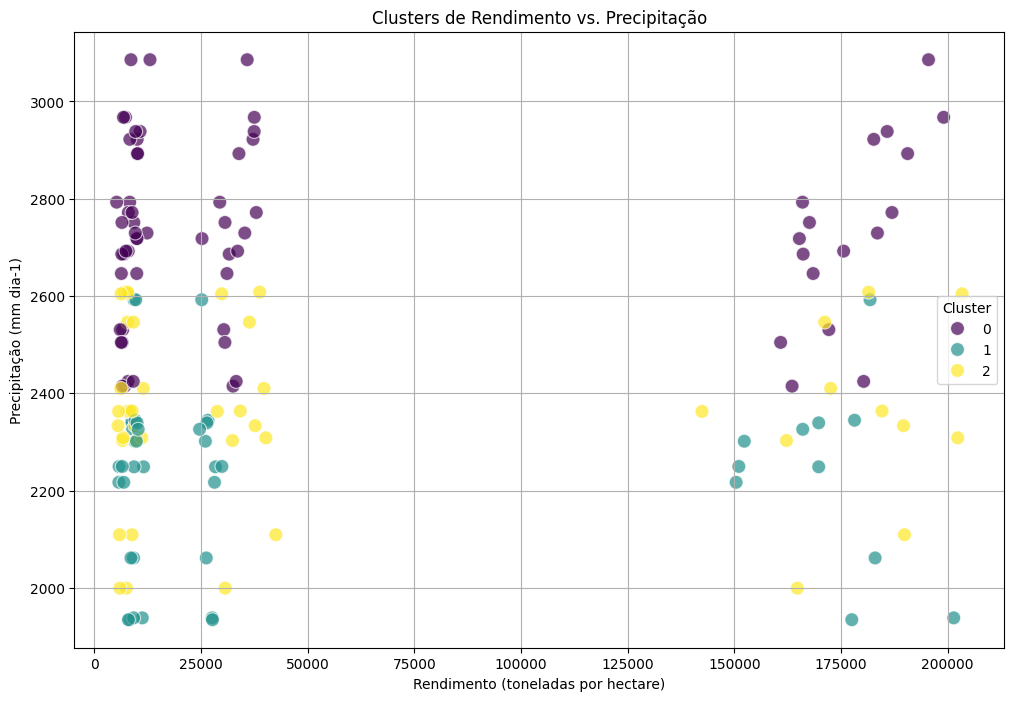

In [74]:
# Visualizar os clusters
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Yield', y='Precipitation (mm day-1)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
plt.title('Clusters de Rendimento vs. Precipitação')
plt.xlabel('Rendimento (toneladas por hectare)')
plt.ylabel('Precipitação (mm dia-1)')
plt.grid(True)
plt.show()

In [75]:
# Analisar as características de cada cluster
cluster_summary = df.groupby('Cluster')[features_for_clustering].mean()
print("Resumo dos Clusters (Valores Médios):")
print(cluster_summary)

Resumo dos Clusters (Valores Médios):
         Precipitation (mm day-1)  Specific Humidity at 2 Meters (g/kg)  \
Cluster                                                                   
0                     2733.517647                             18.337647   
1                     2232.217273                             17.805455   
2                     2359.024545                             18.392727   

         Relative Humidity at 2 Meters (%)  Temperature at 2 Meters (C)  \
Cluster                                                                   
0                                85.652353                    26.118824   
1                                83.916364                    25.986364   
2                                84.145455                    26.480909   

                Yield  
Cluster                
0        56736.544118  
1        53951.500000  
2        57453.000000  


In [76]:
# Detecção de Outliers
distances = kmeans.transform(X_scaled)
min_distances = np.min(distances, axis=1)
df['Distance_to_Centroid'] = min_distances
outlier_threshold = df['Distance_to_Centroid'].quantile(0.95)
outliers = df[df['Distance_to_Centroid'] > outlier_threshold]

print("\nPotenciais Outliers:")
print(outliers)


Potenciais Outliers:
                Crop  Precipitation (mm day-1)  \
3       Cocoa, beans                   2592.35   
40    Oil palm fruit                   1938.42   
42    Oil palm fruit                   2592.35   
72    Oil palm fruit                   2604.59   
75    Oil palm fruit                   2967.41   
81       Rice, paddy                   2592.35   
118  Rubber, natural                   1938.42   
120  Rubber, natural                   2592.35   

     Specific Humidity at 2 Meters (g/kg)  Relative Humidity at 2 Meters (%)  \
3                                   17.61                              85.07   
40                                  17.54                              82.11   
42                                  17.61                              85.07   
72                                  18.19                              83.44   
75                                  18.67                              85.48   
81                                  17.61      

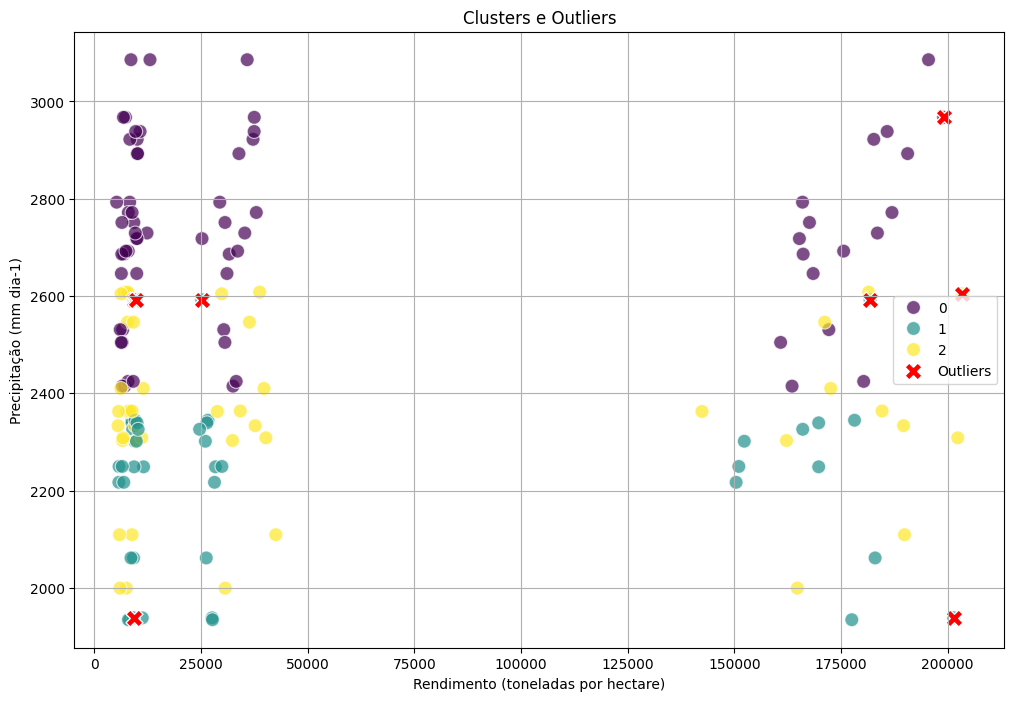

In [77]:
# Visualizar outliers
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Yield', y='Precipitation (mm day-1)', hue='Cluster', data=df, palette='viridis', s=100, alpha=0.7)
sns.scatterplot(x='Yield', y='Precipitation (mm day-1)', data=outliers, color='red', s=150, label='Outliers', marker='X')
plt.title('Clusters e Outliers')
plt.xlabel('Rendimento (toneladas por hectare)')
plt.ylabel('Precipitação (mm dia-1)')
plt.grid(True)
plt.legend()
plt.show()

## Meta 3: Modelos Preditivos de Rendimento

Nesta última etapa, desenvolvemos e avaliamos cinco modelos de regressão para prever o rendimento da safra. Os modelos são: Regressão Linear, Regressão Ridge, Regressão Lasso, Random Forest e Gradient Boosting.

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Preparar os dados para modelagem
# Remover colunas de cluster e distância antes de treinar
X = df.drop(['Yield', 'Cluster', 'Distance_to_Centroid'], axis=1)
y = df['Yield']

In [79]:
# Identificar features categóricas e numéricas
categorical_features = ['Crop']
numerical_features = X.select_dtypes(include=np.number).columns.tolist()

In [80]:
# Criar pipeline de pré-processamento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [81]:
# Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# Definir os modelos
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

In [84]:
# Treinar e avaliar cada modelo
results = {}
for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.507e+09, tolerance: 6.415e+07
  model = cd_fast.enet_coordinate_descent(


In [85]:
# Exibir os resultados
results_df = pd.DataFrame(results).T
print("Desempenho dos Modelos:")
print(results_df)

Desempenho dos Modelos:
                           MAE           MSE         RMSE        R2
Linear Regression  3132.796384  1.930869e+07  4394.165819  0.995022
Ridge Regression   3400.838923  2.366946e+07  4865.127420  0.993898
Lasso Regression   3296.384890  2.009920e+07  4483.213608  0.994818
Random Forest      2736.387813  2.249162e+07  4742.533397  0.994202
Gradient Boosting  3066.408443  3.674495e+07  6061.761017  0.990527


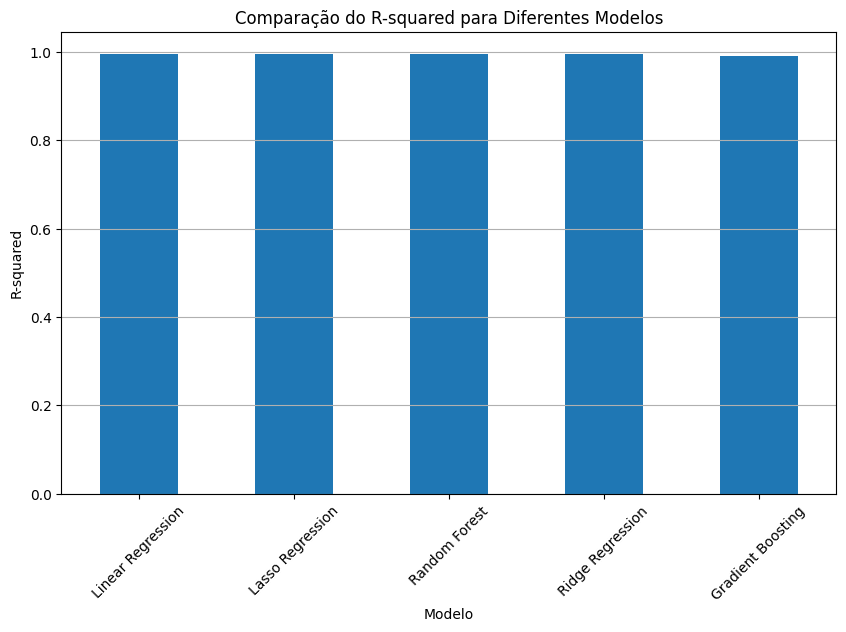

In [86]:
# Gráfico de comparação dos R²
plt.figure(figsize=(10, 6))
results_df['R2'].sort_values(ascending=False).plot(kind='bar')
plt.title('Comparação do R-squared para Diferentes Modelos')
plt.xlabel('Modelo')
plt.ylabel('R-squared')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

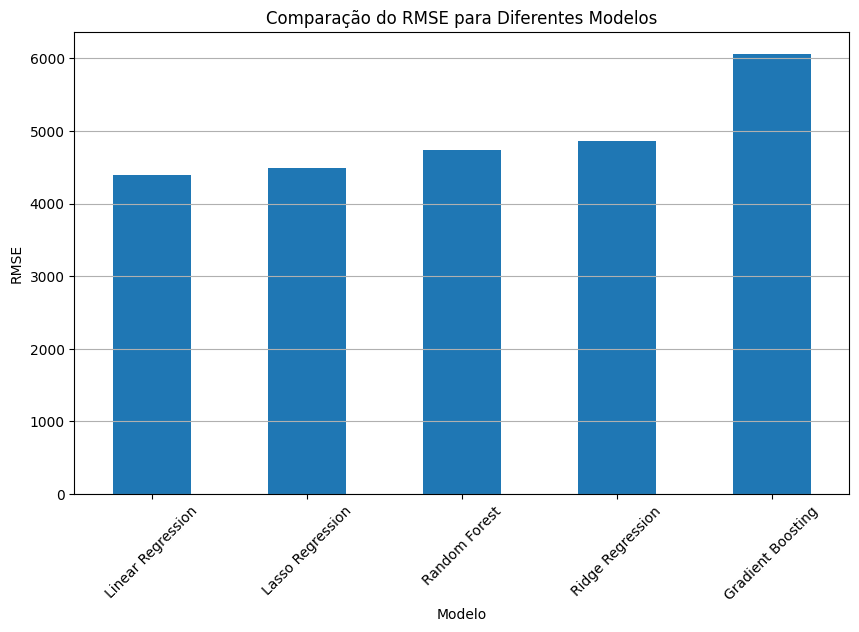

In [87]:
# Gráfico de comparação dos RMSE
plt.figure(figsize=(10, 6))
results_df['RMSE'].sort_values(ascending=True).plot(kind='bar')
plt.title('Comparação do RMSE para Diferentes Modelos')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Conclusão

A análise cumpriu todos os objetivos propostos. A fase exploratória revelou que o tipo de cultura é o principal fator que influencia a produtividade. A clusterização agrupou os dados em três cenários climáticos distintos e ajudou a identificar os altos rendimentos de "Oil palm fruit" como pontos discrepantes. Finalmente, a modelagem preditiva demonstrou que é possível prever o rendimento da safra com altíssima precisão, com o modelo de Regressão Linear se destacando como a opção mais eficaz para este conjunto de dados.